#<center>Visualización y Análisis del Dataset</center>

<center>En este notebook va a encontrar la lectura y análisis del dataset con el que se va a entrenar posteriormente el modelo de red neuronal elegido.</center>

In [ ]:
# Se importa Google Drive para acceder a la base de datos previamente cargada en Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se descomprimen los datos y se especifica la ruta en la que serán almacenados
!unzip "/content/drive/MyDrive/DeepVision/test_database.zip" -d "/content/drive/MyDrive/DeepVision/data_analysis"

In [ ]:
# Se importan las librerías necesarias utilizadas a lo largo del notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
# Paths o rutas necesarias que contienen los datos
train_path = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/train'
test_path = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/test'

train_0 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/train/0'
train_1 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/train/1'
train_2 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/train/2'
train_3 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/train/3'

test_0 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/test/0'
test_1 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/test/1'
test_2 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/test/2'
test_3 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/test/3'

# Visualization of Class Balancing

En esta sección se observará la distribución de las clases para cada conjunto de datos: Train y Test.

**Train**

In [ ]:
train0 = os.listdir(train_0) # retorna todos los archivos contenidos en esa ruta
train1 = os.listdir(train_1)
train2 = os.listdir(train_2)
train3 = os.listdir(train_3)

train_x_axis = os.listdir(train_path) # retorna los labels 0,1,2,3
train_y_axis = [len(train0), len(train1), len(train2), len(train3)] # lista que almacena el número de imágenes en cada carpeta/clase

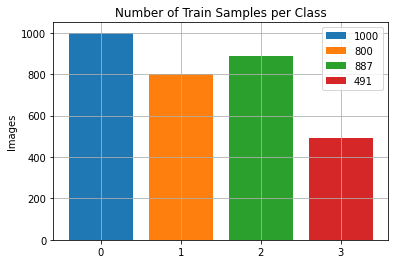

In [ ]:
# Diagrama de barras 
fig_train, ax_train = plt.subplots()
# Cuatro barras: a,b,c,d | eje x: 0,1,2,3 - eje y: # de muestras por clase - label: string # de muestras por clase
a = ax_train.bar(x=train_x_axis[0], height=train_y_axis[0], label=str(train_y_axis[0]))
b = ax_train.bar(x=train_x_axis[1], height=train_y_axis[1], label=str(train_y_axis[1]))
c = ax_train.bar(x=train_x_axis[2], height=train_y_axis[2], label=str(train_y_axis[2]))
d = ax_train.bar(x=train_x_axis[3], height=train_y_axis[3], label=str(train_y_axis[3]))
ax_train.legend() # para plotear # de muestras por clase
ax_train.set_ylabel('Images')
ax_train.set_title('Number of Train Samples per Class')
plt.grid(True)

**Test**

In [ ]:
test0 = os.listdir(test_0)
test1 = os.listdir(test_1)
test2 = os.listdir(test_2)
test3 = os.listdir(test_3)

test_x_axis = os.listdir(test_path)
test_y_axis = [len(test0), len(test1), len(test2), len(test3)]

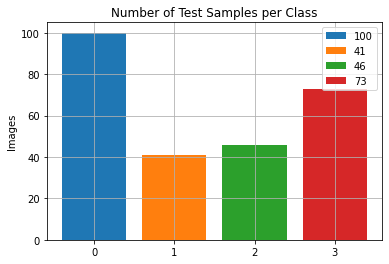

In [ ]:
fig_test, ax_test = plt.subplots()
a = ax_test.bar(x=test_x_axis[0], height=test_y_axis[0], label=str(test_y_axis[0]))
b = ax_test.bar(x=test_x_axis[1], height=test_y_axis[1], label=str(test_y_axis[1]))
c = ax_test.bar(x=test_x_axis[2], height=test_y_axis[2], label=str(test_y_axis[2]))
d = ax_test.bar(x=test_x_axis[3], height=test_y_axis[3], label=str(test_y_axis[3]))
ax_test.legend(loc='upper right')
ax_test.set_ylabel('Images')
ax_test.set_title('Number of Test Samples per Class')
plt.grid(True)

**Conclusion**

Se puede observar un notorio desbalanceo de clases tanto en train como en test, así como un número bajo de muestras para cada clase. Razones suficientes para aplicar Data Augmentation: primero para balancear las clases y, segundo para aumentar el número de imágenes.

# Scatter Plot of Image Dimensions

En esta sección se observa un gráfico de dispersión del tamaño de las imágenes para analizar qué tan variados son.

**Train**

In [ ]:
# Listas vacias para almacenar el ancho y alto de todas las imágenes de train
train_width = [] 
train_height = []
folder_name = os.listdir(train_path)
# Ciclo for que recorre las carpetas de train y lee las imágenes
for i in folder_name: 
  folder_path = os.path.join(train_path,i)
  for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path , img_name)
    img = cv.imread(img_path)
    train_width.append(img.shape[0]) 
    train_height.append(img.shape[1])

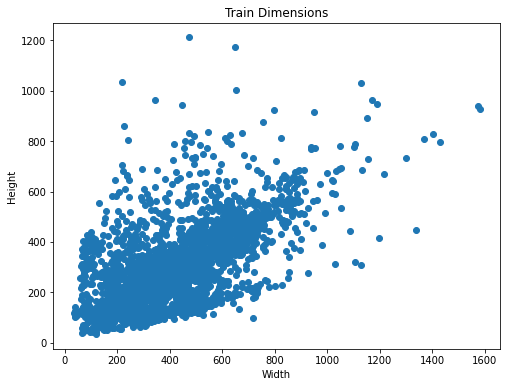

In [ ]:
# Convertir listas a arreglos
train_width = np.array(train_width)
train_height = np.array(train_height)

# Graficar la dispersión del tamaño de las imágenes
plt.figure(figsize=(8,6))
plt.scatter(train_width, train_height)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title('Train Dimensions')
plt.show()

In [ ]:
# Creación de un DataFrame para visualización de tamaño mínimo, máximo y promedio de las imágenes de train
# Fila 0 corresponde al ancho de las imágenes
# Fila 1 corresponde al alto de las imágenes
data = {'Average': [str(round(np.average(train_width))), str(round(np.average(train_height)))],
        'Min': [str(np.min(train_width)), str(np.min(train_height))],
        'Max': [str(np.max(train_width)), str(np.max(train_height))]}  
df = pd.DataFrame(data)
df

,Average,Min,Max
0,397,35,1580
1,289,34,1212


**Test**

In [ ]:
test_width = []
test_height = []
folder_name = os.listdir(test_path)
for i in folder_name: 
  folder_path = os.path.join(test_path,i)
  for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path , img_name)
    img = cv.imread(img_path)
    test_width.append(img.shape[0]) 
    test_height.append(img.shape[1])

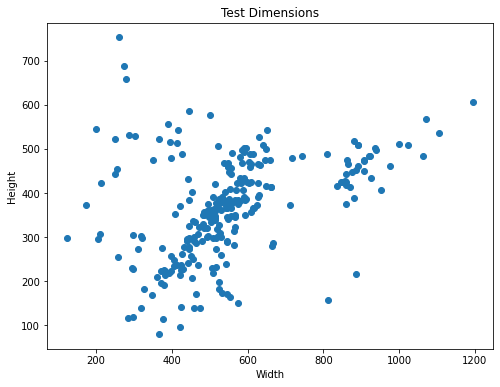

In [ ]:
test_width = np.array(test_width)
test_height = np.array(test_height)

plt.figure(figsize=(8,6))
plt.scatter(test_width, test_height)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title('Test Dimensions')
plt.show()

In [ ]:
data = {'Average': [str(round(np.average(test_width))), str(round(np.average(test_height)))],
        'Min': [str(np.min(test_width)), str(np.min(test_height))],
        'Max': [str(np.max(test_width)), str(np.max(test_height))]}  
df = pd.DataFrame(data)
df

,Average,Min,Max
0,550,124,1196
1,366,80,753


**Conclusion**

En vista de que las dimensiones tanto de train como de test son muy heterogéneas, es necesario definir una dimensión estándar para aplicarla a todas las imágenes y, de esta manera, facilitar el entrenamiento y aprendizaje del modelo de red neuronal al homogenizar los datos.

# Visualization of Some Samples

En esta sección se observan algunas imágenes de cada clase.

**Class 0: Other Objects**

Text(0.5, 0.98, 'Class 0: Other Objects')

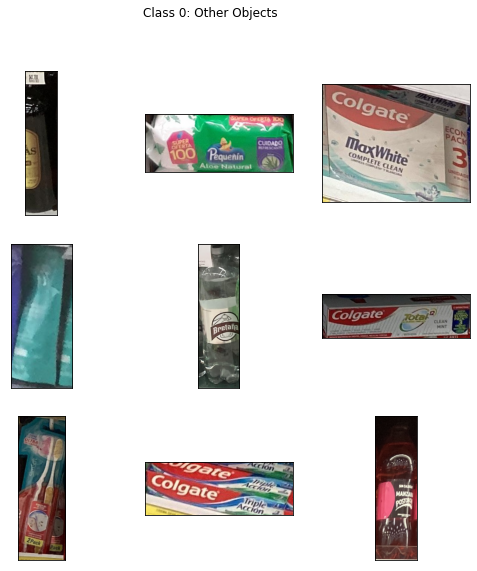

In [ ]:
fig = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(train_0,os.listdir(train_0)[i]))
  ax = fig.add_subplot(3,3,i+1)
  ax = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig.suptitle('Class 0: Other Objects')

**Class 1: Cereal Zucaritas**

Text(0.5, 0.98, 'Class 1: Cereal Zucaritas')

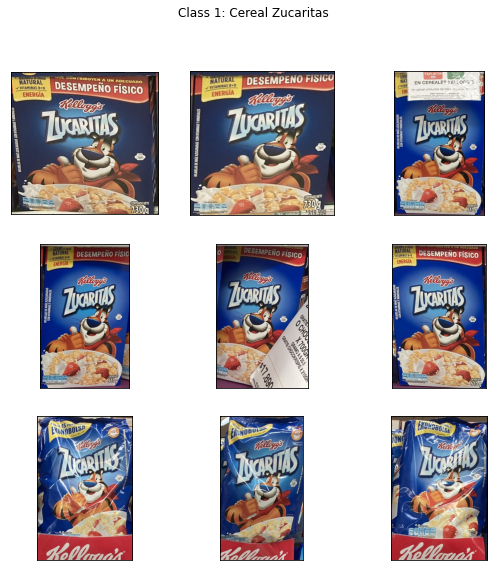

In [ ]:
fig1 = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(train_1, os.listdir(train_1)[i]))
  ax1 = fig1.add_subplot(3,3,i+1)
  ax1 = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig1.suptitle('Class 1: Cereal Zucaritas')

**Class 2: Cereal Choco Krispis**

Text(0.5, 0.98, 'Class 2: Cereal Choco Krispis')

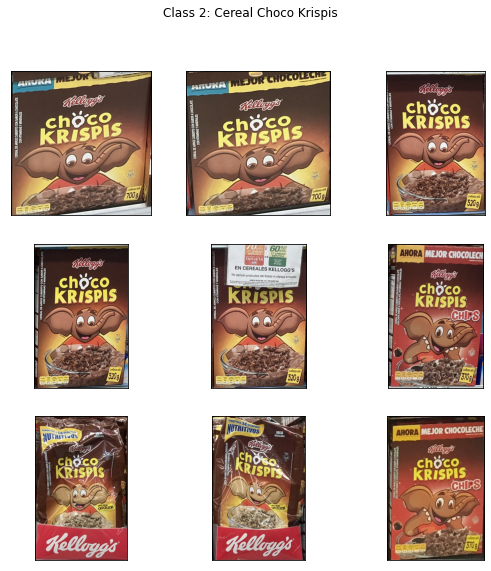

In [ ]:
fig2 = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(train_2, os.listdir(train_2)[i]))
  ax2 = fig2.add_subplot(3,3,i+1)
  ax2 = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig2.suptitle('Class 2: Cereal Choco Krispis')

**Class 3: Cereal Froot Loops**

Text(0.5, 0.98, 'Class 3: Cereal Froot Loops')

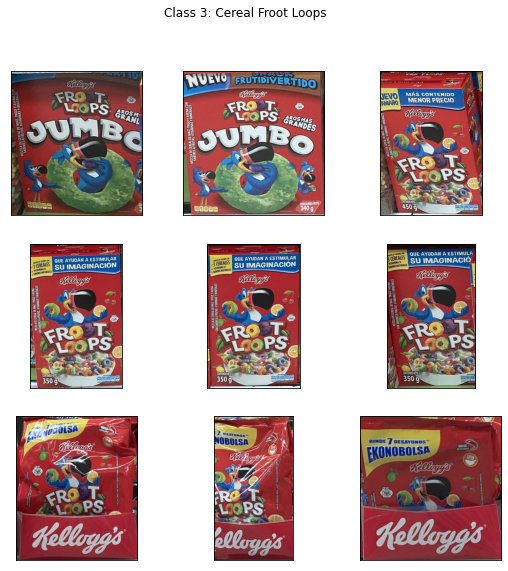

In [ ]:
fig3 = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(train_3, os.listdir(train_3)[i]))
  ax3 = fig3.add_subplot(3,3,i+1)
  ax3 = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig3.suptitle('Class 3: Cereal Froot Loops')

**Conclusión**

Las imágenes del dataset cuentan con 3 canales (RGB). Se considera necesario conservar los 3 canales para que la red neuronal aprenda de esas características de color también.